# Alex Irlbeck -- Linear Regression Homework

In [133]:
# imports all necessary packages
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

from statsmodels.sandbox.regression.predstd import wls_prediction_std

# allow plots to appear directly in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

    Research      Admin  Marketing       State     Profit
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94


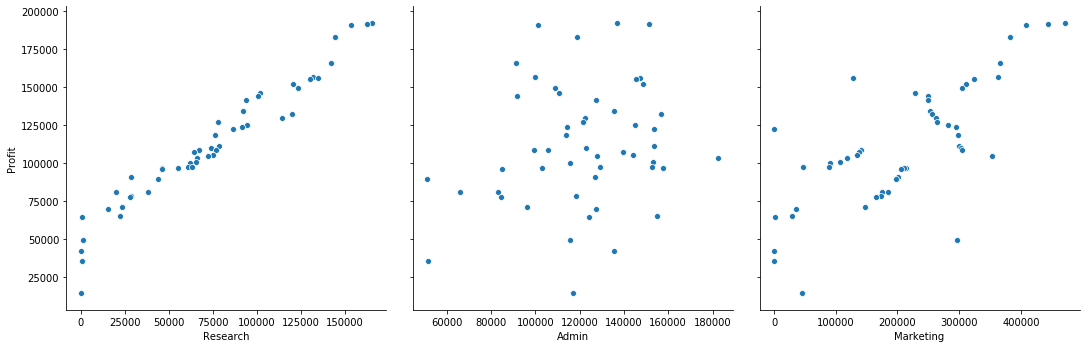

In [134]:
#Read in the data on expenses and profits for a series of startup companies
#the goal here is to determine the different relations between expenses and profit to determine which of the three
#expenses dictate the most profit
data=pd.read_csv('StartupProfits.csv', index_col=0)
print(data.head())
#Pairwise comparison of the data
sns.pairplot(data, x_vars=['Research','Admin', 'Marketing'], y_vars='Profit', height = 5)

In [135]:
#Manipulate the data to get rid of the state and profit columns for our x data to be used
X_data=data.drop('State',axis=1)
X2_data=X_data.drop('Profit',axis=1)
print(X2_data.head())
print(X2_data.shape)

    Research      Admin  Marketing
0  165349.20  136897.80  471784.10
1  162597.70  151377.59  443898.53
2  153441.51  101145.55  407934.54
3  144372.41  118671.85  383199.62
4  142107.34   91391.77  366168.42
(50, 3)


In [136]:
#Define our Y axis information for all plots
Y_data=data['Profit']
print(Y_data.head())
print(Y_data.shape)

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64
(50,)


In [137]:
#Setting up our model for a linear regression
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R^2 - Research and Development:  0.9465353160804392
Slope:  [0.85429137]
Intercept:  49032.899141252135


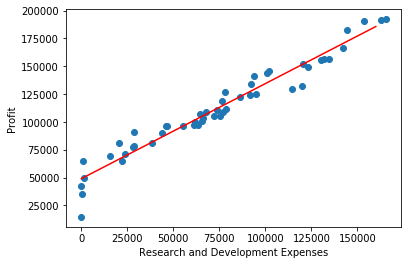

In [138]:
#Research Data
#pulling in the x data to be the research column
x=X2_data.iloc[0:,0]

X = x[:, np.newaxis] #adds a column to our X data in order for it to be plotted
y=Y_data
#Plot the scattered point in our data
plt.scatter(X,y)
plt.xlabel('Research and Development Expenses')
plt.ylabel('Profit')
#breaking down the comparisons using the ols package
data_res=smf.ols(formula='Research~Profit', data=data).fit()
print('R^2 - Research and Development: ', data_res.rsquared)

#Fitting and training the model to our dataset
model.fit(X,y)
xfit=np.linspace(0,160000)
Xfit =xfit[:,np.newaxis]
yfit=model.predict(Xfit)
#Plot out the linear regression
plt.plot(Xfit,yfit,color='red')
#output slope and intercept so you can put together the equation of linear regression
print('Slope: ', model.coef_)
print('Intercept: ', model.intercept_)

R^2 - Administration Expenses:  0.04028714077757212
Slope:  [0.2887492]
Intercept:  76974.47130541757


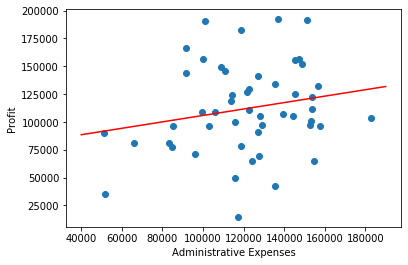

In [140]:
#Admin Data - Repeat the same process as with Research
x=X2_data.iloc[0:,1]

X = x[:, np.newaxis]
y=Y_data
plt.scatter(x,y)
data_admin=smf.ols(formula='Admin~Profit', data=data).fit()
print('R^2 - Administration Expenses: ', data_admin.rsquared)
plt.xlabel('Administrative Expenses')
plt.ylabel('Profit')

model.fit(X,y)
model.coef_
xfit=np.linspace(40000,190000)
Xfit =xfit[:,np.newaxis]
yfit=model.predict(Xfit)
plt.plot(Xfit,yfit,color='red')
print('Slope: ', model.coef_)
print('Intercept: ', model.intercept_)

R^2 - Marketing Expenses:  0.5591535746115515
Slope:  [0.24645926]
Intercept:  60003.54881577171


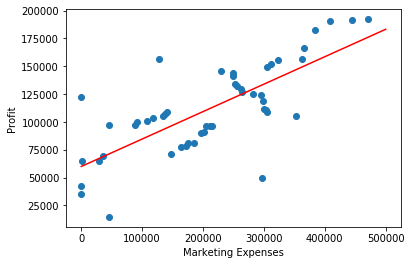

In [141]:
#Marketing Data - Repeat the same process as with research
x=X2_data.iloc[0:,2]

X = x[:, np.newaxis]
y=Y_data
plt.scatter(x,y)
data_mark=smf.ols(formula='Marketing~Profit', data=data).fit()
print('R^2 - Marketing Expenses: ', data_mark.rsquared)
plt.xlabel('Marketing Expenses')
plt.ylabel('Profit')

model.fit(X,y)
xfit=np.linspace(0,500000)
Xfit =xfit[:,np.newaxis]
yfit=model.predict(Xfit)
plt.plot(Xfit,yfit,color='red')
print('Slope: ', model.coef_)
print('Intercept: ', model.intercept_)

# Conclusion

From this information we can answer a few questions. From looking at the Rsquared values it looks like the R&D dollars is the most accurate corelation to actual profit with an R2 of 0.95 while Admistrative expenses have basically no corrleation and marketing has a weak correlation for this dataset. In addition we could also break down the equation for each and use it as a way to predict how much money we will make given we spend X on X. For example, the Research equation comes out to y = 0.85429(X) + 49032. So if I spent 100,000 on R&D I would expect a profit of 134,461 based off of this model predictions